<a href="https://colab.research.google.com/github/adiego8/fraud_detection/blob/master/Insurance_Claims_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FRAUD DETECTION

In [0]:
!pip install joypy

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import scipy
import pandas as pd
import statsmodels
import patsy
import dateutil
import numpy as np
import plotly as pl
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
import joypy

In [0]:
ds = pd.read_csv('insurance_claims.csv')

In [0]:
ds.shape

(1000, 39)

In [0]:
#demonstrate all the statistical and numerical features in the data
ds.describe()

In [0]:
ds.info()

In [0]:
#check fields with null values
ds = ds.replace('?',np.nan)
ds.isnull().any()

In [0]:
ds['collision_type'].fillna(ds['collision_type'].mode()[0],inplace=True) #the null are filled with the most typical collision type
ds['collision_type']

In [0]:
ds['property_damage'].fillna('NO',inplace=True)
ds['property_damage'].count()
ds['police_report_available'].fillna('NO', inplace = True)

In [0]:
ds.isnull().any().any()

False

In [0]:
#plotting scatter plot 
fig = px.scatter(ds,x= 'total_claim_amount', y='policy_annual_premium', color='insured_sex',marginal_x='rug',marginal_y='histogram')
fig.show()

In [0]:
fraud = ds['fraud_reported'].value_counts() #get the number of YES and NO in that specific column in the dataset

In [0]:
size_fraud = fraud.values # creates an array with the NO as [0] and YES as [1]

In [0]:
label_fraud = fraud.index # created the index in the array

In [0]:
colors = ['silver','gold'] #create an array in order to show it as the colors of the pie graph 

In [0]:
trace = go.Pie(labels=label_fraud, values= size_fraud , marker= dict(colors=colors),name='Frauds') # create the actual graph with the previous values
trace
df = [trace] #this is the data to plot

In [0]:
#create layout class
layout = go.Layout(title='Distribution of Frauds') 

In [0]:
fig1 = go.Figure(data=df , layout=layout) # created the figure to plot

In [0]:
py.iplot(fig1) # final plot of the figure1 which has the data refered as the distribution of fraud

ANOTHER VISUALIZATION METHOD WITH OTHER VARIABLES IN THE DATASET

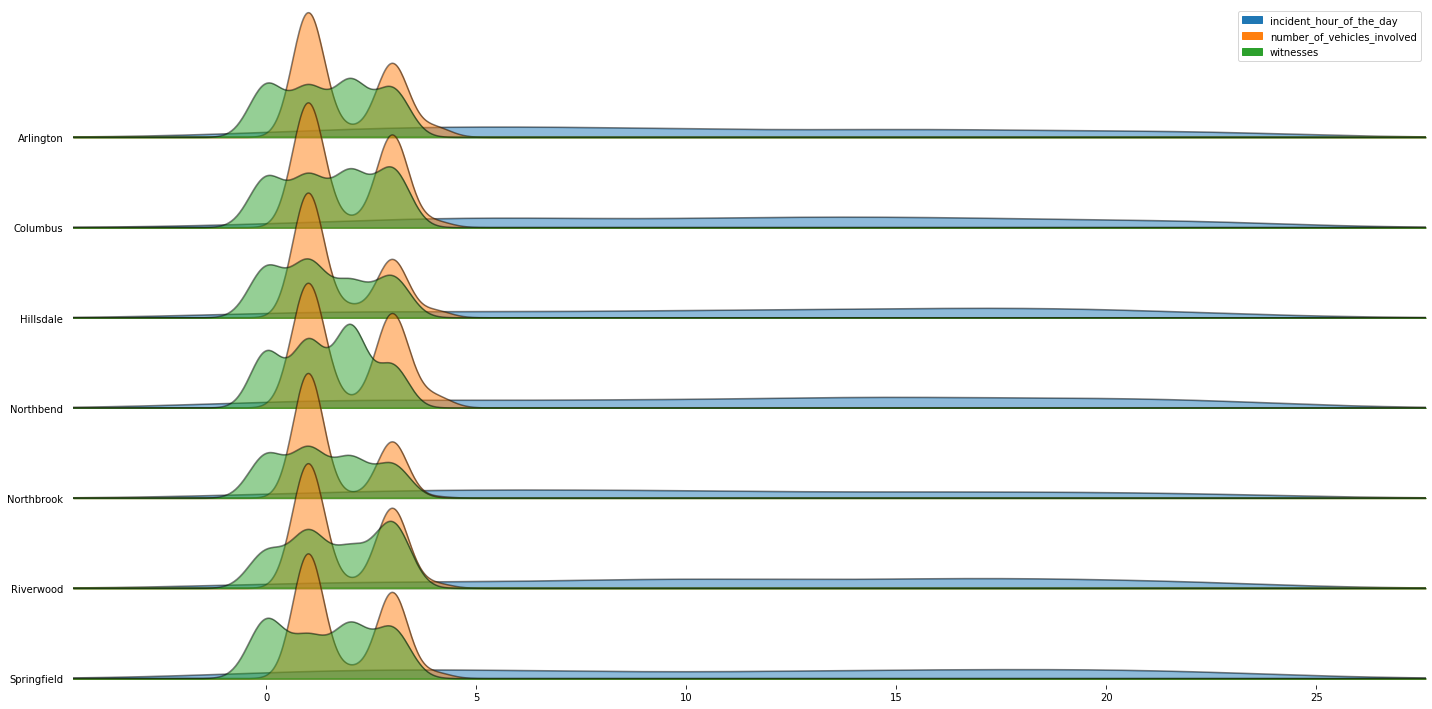

In [0]:
#using matplot lib:
fig,axes = joypy.joyplot(
    ds, column = ['incident_hour_of_the_day','number_of_vehicles_involved','witnesses'],by='incident_city',ylim = 'own', figsize = (20, 10), alpha = 0.5, 
    legend = True
)
plt.show()

DATA PROCESSING

In [0]:
#extract days, month and years from policy bind date
ds['policy_bind_date'] = pd.to_datetime(ds['policy_bind_date'],errors = 'coerce')
# encode fraud reported to numerical values
ds['fraud_reported'] = ds['fraud_reported'].replace(('Y','N'),(0,1))

In [0]:
#make sure it works
ds['fraud_reported']
ds['fraud_reported'].value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [0]:
#check correlation with auto models and the fraud reported by getting the mean of the fraud reported on each specific auto model
ds[['auto_model','fraud_reported']].groupby(['auto_model'],as_index=False).mean().sort_values(by='fraud_reported', ascending = False)

In [0]:
ds_auto_model = ds[['auto_model','fraud_reported']].groupby(['auto_model'],as_index=False).mean().sort_values(by='fraud_reported', ascending = False)
ds_auto_model.shape

(39, 2)

In [0]:
#create a new column for the correlation matrix with the means for auto_models related to fraud, MAKING SURE THAT TYPE OF THE VARIABLE IS THE SAME TO THE MEAN
for i in range(ds.shape[0]):
    ds['auto_model_means'] = 0.0
    print(ds['auto_model_means'][i])

In [0]:
ds.info()

In [0]:
# assignation of the means to the new column
for i in range(ds_auto_model.shape[0]):
    model1 = ds_auto_model['auto_model'][i]
    mean = ds_auto_model['fraud_reported'][i]
    for j in range(ds.shape[0]):
        model = ds['auto_model'][j]
        if model == model1:
            ds['auto_model_means'][j] = mean   

In [0]:
#doing the same as before for the automake 
ds_auto_make = ds[['auto_make', 'fraud_reported']].groupby(['auto_make'],as_index= False).mean().sort_values(by='fraud_reported',ascending = False)